In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 63s 0us/step


In [2]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 3.7 MB/s eta 0:00:00


In [3]:
!pip3 install opencv-python

In [6]:
data_dir

'.\\datasets\\flower_photos'

In [7]:
import pathlib # convert data to windows
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [13]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

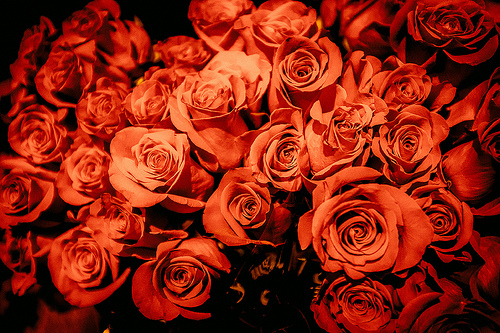

In [17]:
PIL.Image.open(str(roses[2]))

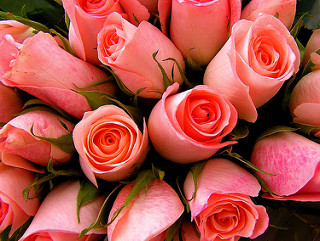

In [18]:
PIL.Image.open(str(roses[8]))

In [20]:
tulips =list(data_dir.glob("tulips/*"))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

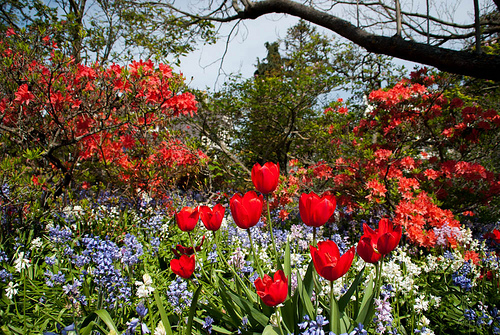

In [22]:
PIL.Image.open(str(tulips[5]))

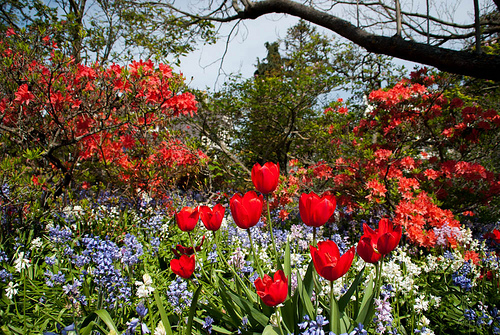

In [23]:
PIL.Image.open(str(tulips[5]))

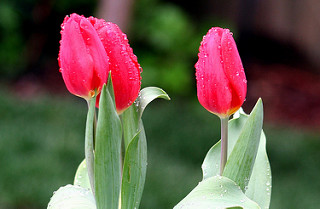

In [24]:
PIL.Image.open(str(tulips[0]))

In [25]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [30]:
flowers_images_dict["roses"][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [33]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))#cv2 convert image into 3d path
img.shape

(240, 179, 3)

In [34]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [39]:
X,y =[],[]

for flower_name,images in flowers_images_dict.items():
#     print(flower_name)
#     print(len(images))
      for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [40]:
y[:5]

[0, 0, 0, 0, 0]

In [41]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [43]:
X =np.array(X)
X
y =np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [46]:
len(X_train)

2752

In [47]:
len(X_test)

918

2752

In [49]:
X_train_scaled =X_train/255
X_test_scaled = X_test/255

In [51]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [57]:
num_classes = 5

model = Sequential([
  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 14s 160ms/step - loss: 1.5262 - accuracy: 0.3656
Epoch 2/10
86/86 [==============================] - 13s 156ms/step - loss: 1.0663 - accuracy: 0.5636
Epoch 3/10
86/86 [==============================] - 13s 156ms/step - loss: 0.9098 - accuracy: 0.6439
Epoch 4/10
86/86 [==============================] - 13s 156ms/step - loss: 0.7595 - accuracy: 0.7118
Epoch 5/10
86/86 [==============================] - 14s 157ms/step - loss: 0.5268 - accuracy: 0.8092
Epoch 6/10
86/86 [==============================] - 13s 156ms/step - loss: 0.3671 - accuracy: 0.8663
Epoch 7/10
86/86 [==============================] - 13s 157ms/step - loss: 0.2288 - accuracy: 0.9237
Epoch 8/10
86/86 [==============================] - 13s 157ms/step - loss: 0.1381 - accuracy: 0.9597
Epoch 9/10
86/86 [==============================] - 14s 158ms/step - loss: 0.1078 - accuracy: 0.9669
Epoch 10/10
86/86 [==============================] - 14s 159ms/step - loss: 0.0783 - accura

EXAMPLE OF OVERFITTING

In [58]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 44ms/step - loss: 450.8323 - accuracy: 0.5700


[450.832275390625, 0.5700430870056152]

In [61]:
predictions = model.predict(X_test_scaled)

29/29 [==============================] - 1s 42ms/step


In [62]:
predictions

array([[  6.7771416 ,  16.970583  ,   3.2526927 , -11.396734  ,
          3.9931781 ],
       [ 10.414033  ,   7.1160207 ,  -9.187346  ,  -5.5527153 ,
          5.128047  ],
       [ -2.680731  ,   2.7531044 ,  12.272579  ,  -7.0603356 ,
         -0.597118  ],
       ...,
       [  0.48184818,   3.1841705 ,  -9.4536705 ,   7.414045  ,
          8.137206  ],
       [  3.151705  ,  -0.04479162,   3.73099   ,  -0.60656744,
          2.2279503 ],
       [  2.6391737 ,  -6.692375  ,   1.4525003 ,   2.5153687 ,
          5.1628776 ]], dtype=float32)

In [64]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.7413382e-05, 9.9995923e-01, 1.1024997e-06, 4.7886483e-13,
       2.3118894e-06], dtype=float32)>

In [65]:
np.argmax(score)

1

In [66]:
y_test[0]

1

In [74]:
data_argmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)#to overcome overfit
])

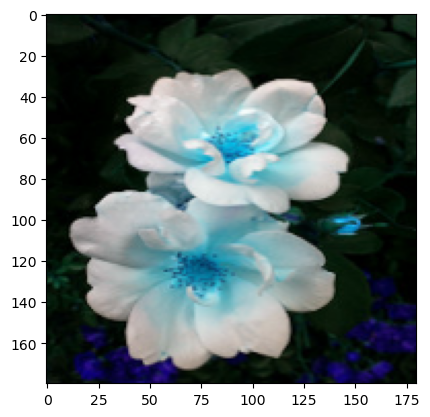

In [70]:
plt.imshow(X[0])

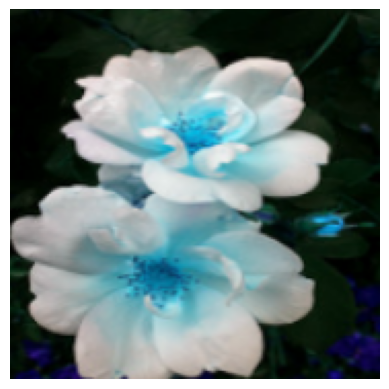

In [78]:

import warnings
warnings.filterwarnings("ignore")
plt.axis("off")
plt.imshow(data_argmentation(X)[0].numpy().astype("uint8"))

In [76]:
data_argmentation_contast = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)#to overcome overfit
])

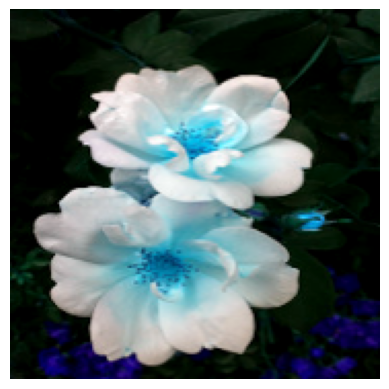

In [77]:
plt.axis("off")
plt.imshow(data_argmentation_contast(X)[0].numpy().astype("uint8"))

In [79]:
import warnings
warnings.filterwarnings("ignore")


In [80]:
data_argmentation_Rotation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9)#to overcome overfit
])

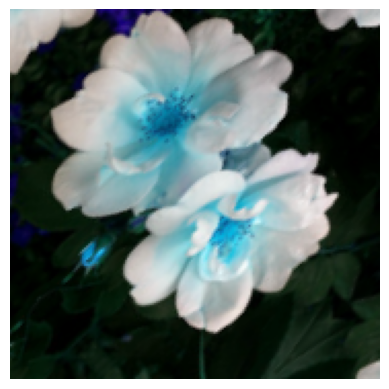

In [82]:
plt.axis("off")
plt.imshow(data_argmentation_Rotation(X)[0].numpy().astype("uint8"))

In [93]:
data_augmentation = keras.Sequential(
  [
    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [94]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 18s 185ms/step - loss: 1.4746 - accuracy: 0.3797
Epoch 2/10
86/86 [==============================] - 16s 184ms/step - loss: 1.0829 - accuracy: 0.5665
Epoch 3/10
86/86 [==============================] - 16s 191ms/step - loss: 0.9784 - accuracy: 0.6159
Epoch 4/10
86/86 [==============================] - 16s 188ms/step - loss: 0.9042 - accuracy: 0.6464
Epoch 5/10
86/86 [==============================] - 16s 183ms/step - loss: 0.8351 - accuracy: 0.6751
Epoch 6/10
86/86 [==============================] - 16s 183ms/step - loss: 0.7780 - accuracy: 0.7060
Epoch 7/10
86/86 [==============================] - 16s 191ms/step - loss: 0.7507 - accuracy: 0.7166
Epoch 8/10
86/86 [==============================] - 16s 191ms/step - loss: 0.6991 - accuracy: 0.7315
Epoch 9/10
86/86 [==============================] - 17s 197ms/step - loss: 0.6669 - accuracy: 0.7493
Epoch 10/10
86/86 [==============================] - 17s 192ms/step - loss: 0.6235 - accura

In [95]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 42ms/step - loss: 1.1262 - accuracy: 0.6253


[1.1262301206588745, 0.6252723336219788]